<div style="text-align:center; background-color:#8c6976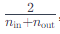; border-radius:10px; padding:10px;">
  <h1>Weight Initialization</h1>
</div>


**Objective:** Assess understanding of weight initialization techniques in artificial neural networks. Evaluate the impact of different initialization methods on model performance. Enhance knowledge of weight initialization's role in improving convergence and avoiding vanishing/exploding gradients.

# Part 1: Understanding Weight Initialization


---

# Q1. Explain the importance of weight initialization in artificial neural networks. Why is it necessary to initialize the weights carefully ?

Before begning the training process we have to intilizing some weights for each input data, which is about to go through from the neurones of each layers of a artificial neural network. This process is called the weight intilization.

Weight Initilization is an important step , while training the neural networks as it will directly impact the performance of the model. A proper weight initilization are ceses the problems like.. vanishing gradients, exploding gradients, and slow convergence.

- Xavier Intilization
- He Intilization
- Zero Initilization
- Random Initilization

# Q2. Describe the challenges associated with improper weight initialization. How do these issues affect model training and convergence ?


Improper weight initilization can raise the big problems for our model as  In the process of backpropagation during training, gradients are computed and used to update the weights. If the weights are initialized too small, the gradients may become extremely small (vanish), leading to slow or stalled learning. On the other hand, if the weights are initialized too large, the gradients may become too large (explode), causing the optimization algorithm to overshoot and fail to converge. These problems are harful for our model accuracy and decresing the performance of the model as well.

# Q3. Discuss the concept of variance and how it relates to weight initialization. Why is it crucial to consider the variance of weights during initialization ?

Variance plays a significant role in the vanishing and exploding gradient problems. During backpropagation, gradients are calculated and used to update the weights. If the variance of the weights is too low, it can lead to vanishing gradients, where the gradients become extremely small and hinder the learning process, especially in deeper layers. On the other hand, if the variance is too high, it can result in exploding gradients, causing the optimization algorithm to overshoot and fail to converge.

# Part 2: Weight Initilization Techniques


---


# Q4. Explain the concept of zero initialization. Discuss its potential limitations and when it can be appropriate to use ?

In Zero intilization technique , initially the weights of all inputs has considered to be zero. In other words , before starting the trining process, zero intilizer , consider the wight as zero for each input neuorones.

**Limititation of Zero Initilization :**

- Model will not able to identify the complex probelms because when all weights are initialized to the same value, each neuron in a given layer is essentially learning the same features.

- Zero initialization can lead to the vanishing gradient problem. If all weights are set to zero, during backpropagation, the gradients for each weight may be the same, causing the model to struggle to update the weights effectively.

**When Zero Initilization is appropriate :**

Zero initialization can be used as a baseline for comparison when testing the effectiveness of other weight initialization methods. Comparing the performance of models with zero initialization against models with more sophisticated initialization methods helps demonstrate the impact of proper weight initialization.

# Q5.  Describe the process of random initialization. How can random initialization be adjusted to mitigate potential issues like saturation or vanishing/exploding gradients ?

Random Initilization is a process to assign the random weights to the input neurones before starting the trainig process.It can provide the capicity to model for identifying the diverse petterns of the data , which is missing in the zero intilization. In this random initilization data has been distributed by gausian or uniform distribution .

**Gaussian Distribution :**

In Gaussian random initialization, weights are sampled from a normal distribution with a mean of 0 and a standard deviation (sigma) that can be adjusted. The formula for initialization is often:

- W ~ N(0, sigma^2)

**Uniform Distribution :**

In uniform random initialization, weights are sampled from a uniform distribution within a specified range. The formula for initialization is often:

- W ~ Uniform (a,-a)

# Q6. Discuss the concept of Xavier/Glorot initialization. Explain how it addresses the challenges of improper weight initialization and the underlying theory behind it?

Xavier initialization, also known as Glorot initialization, is a weight initialization technique designed to address challenges in neural network training, specifically the issues of vanishing or exploding gradients. The method achieves this by setting the initial weights to values drawn from a carefully chosen distribution that takes into account the number of input and output units in a layer.

The underlying theory is to maintain a consistent variance in the activations across layers during both forward and backward passes. The variance of the weights is adjusted to prevent gradients from becoming too small or too large. For a Gaussian distribution, the Xavier initialization sets the variance

- sigma^2= 2/ N(in) +  N(out)

where N(in) and N(out) are inputs and outputs respectivly

This method helps overcome challenges related to the vanishing gradient problem by ensuring that the weights are initialized in a way that allows for effective information flow through the network during training.

# Q7. Explain the concept of He initialization. How does it differ from Xavier initialization, and when is it preferred ?


He initialization is a weight initialization method designed for neural networks using rectified linear unit (ReLU) activation functions. Proposed by Kaiming He and his colleagues, this technique adjusts the variance of the initial weights based solely on the number of input units.

The key distinction from Xavier initialization lies in the variance adjustment. Xavier initialization considers both input and output units, while He initialization focuses only on the number of input units. This makes He initialization particularly well-suited for activation functions like ReLU, which can suffer from the "dying ReLU" problem where neurons become inactive during training.

He initialization is preferred in scenarios where ReLU or its variants are used as activation functions, especially in deep neural networks. It addresses issues related to the zero mean of ReLU and contributes to more effective training, making it a popular choice for modern deep learning architectures.

# Part 3: Applying Weight Initilization


---


# Q8. Implement different weight initialization techniques (zero initialization, random initialization, Xavier initialization, and He initialization) in a neural network using a framework of Eour choice. Train the model on a suitable dataset and compare the performance of the initialized models.

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [6]:

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [7]:

# Define a function to create a simple neural network
def create_model(initializer):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(128, kernel_initializer=initializer, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [8]:
# Initialize models with different weight initializations
zero_model = create_model('zeros')
random_model = create_model('random_normal')
xavier_model = create_model('glorot_normal')
he_model = create_model('he_normal')


In [9]:
# Train the models
epochs = 10
batch_size = 64

zero_history = zero_model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels), verbose=0)
random_history = random_model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels), verbose=0)
xavier_history = xavier_model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels), verbose=0)
he_history = he_model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels), verbose=0)


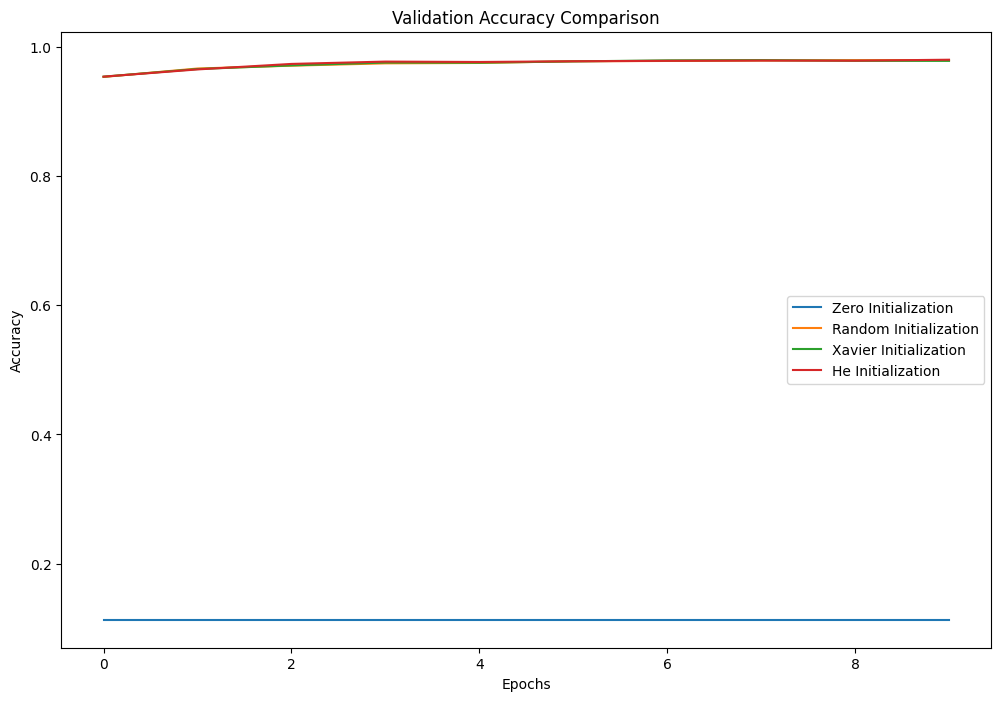

In [11]:

# Plot the training history for comparison
plt.figure(figsize=(12, 8))
plt.plot(zero_history.history['val_accuracy'], label='Zero Initialization')
plt.plot(random_history.history['val_accuracy'], label='Random Initialization')
plt.plot(xavier_history.history['val_accuracy'], label='Xavier Initialization')
plt.plot(he_history.history['val_accuracy'], label='He Initialization')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Q9. Discuss the considerations and tradeoffs when choosing the appropriate weight initialization technique for a given neural network architecture and task.

Xavier Initilization works well with Sigmoid and Tanh activation Function. While He is best with Relu activation Function.